In [19]:
import os
os.chdir(os.getcwd())

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [21]:
orig_df = pd.read_csv("titanic_data_preprocessed.csv")
orig_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
orig_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
orig_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [24]:
df = orig_df[['Survived','Pclass','Age','SibSp', 'Parch','Fare']]
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [25]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=99)
X_train = df_train[['Pclass','Age','SibSp', 'Parch','Fare']]
y_train = df_train['Survived']
X_test = df_test[['Pclass','Age','SibSp', 'Parch','Fare']]
y_test = df_test['Survived']

In [26]:
# Can change value of random_state on your own
random_state_val = 14

In [27]:
model=DecisionTreeClassifier(random_state=random_state_val)
model=model.fit(X_train,y_train)

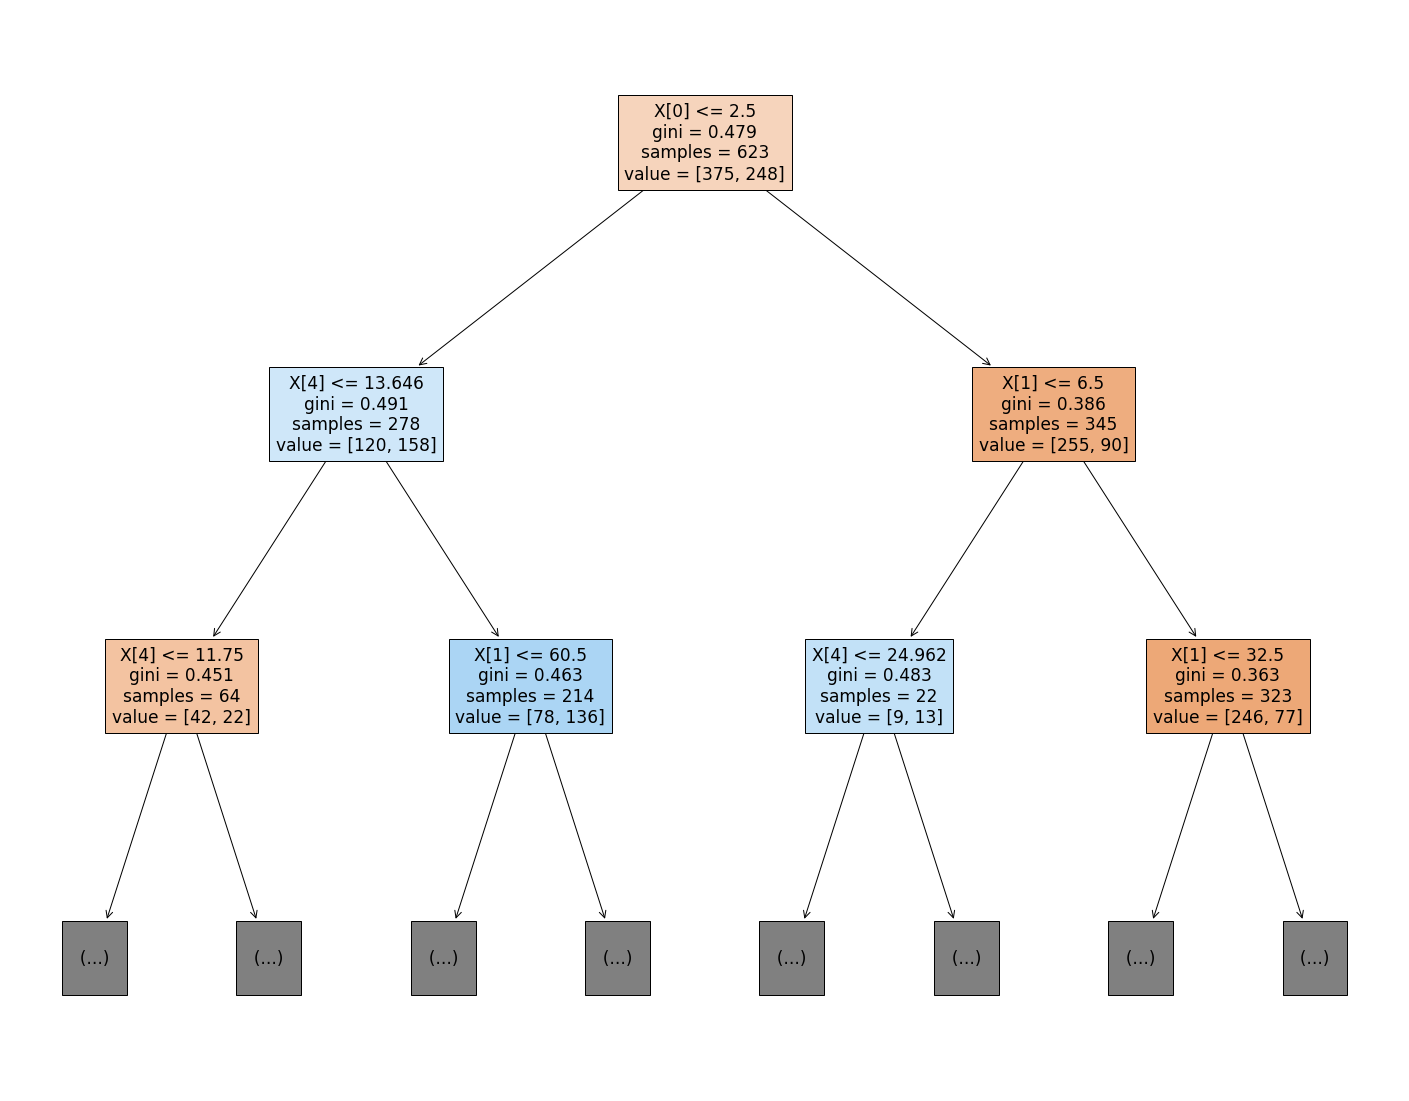

In [28]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, max_depth=2,filled=True)
plt.show()
fig.savefig('tree.jpg')

In [29]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0])

In [30]:
print(confusion_matrix(y_test,y_predicted))

[[128  46]
 [ 43  51]]


In [31]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       174
           1       0.53      0.54      0.53        94

    accuracy                           0.67       268
   macro avg       0.64      0.64      0.64       268
weighted avg       0.67      0.67      0.67       268



## Person1

In [32]:
orig_df[orig_df.PassengerId == 170]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,S


In [33]:
x_check1 = pd.DataFrame(columns=['Pclass','Age','SibSp','Parch','Fare'])
x_check1.loc[1] = [3,28,0,0,56.4958]
x_check1

,Pclass,Age,SibSp,Parch,Fare
1,3.0,28.0,0.0,0.0,56.4958


In [34]:
y_predicted1 = model.predict(x_check1)
y_predicted1

array([0])

## Person2

In [35]:
x_check2 = pd.DataFrame(columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
x_check2.loc[1] = [3, 63, 5, 6, 37]
x_check2


,Pclass,Age,SibSp,Parch,Fare
1,3,63,5,6,37


In [36]:
y_predicted2 = model.predict(x_check2)
y_predicted2


array([1])